In [312]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import QuantileRegressor

In [348]:
df = pd.read_csv('../data/data_synth.csv')
df = df.drop(columns=['times'])
data = df.to_numpy()

In [350]:
data_true = data

### error comp util 

In [371]:
def error(data_true, data_forecast):
    h = len(data_forecast[0])
    error = np.mean(np.array([mse(data_true[i+1:i+h+1],data_forecast[i]) for i in range(len(data_true)-h-1)]))

    return error

### hist mean forecasters

In [358]:
def previous_value_forecast(data_true,h=3):
    n = len(data_true)
    data_forecast = np.zeros((n, h, 2))
    
    for i in range(n):
        data_forecast[i,:,0] = data_true[i][0] 
        data_forecast[i,:,1] = data_true[i][1] 

    return data_forecast

def avg_value_forecast(data_true,h=3,w=7):
    n = len(data_true)
    data_forecast = np.zeros((n, h, 2))

    for i in range(n):
        supply_avg = np.mean(data_true[max(0,i-w+1):i+1,0])
        demand_avg = np.mean(data_true[max(0,i-w+1):i+1,1])

        data_forecast[i,:,0] = supply_avg
        data_forecast[i,:,1] = demand_avg
    return data_forecast
            

In [359]:
data_forecast_avg = avg_value_forecast(data_true,h=3,w=3)
data_forecast_last = previous_value_forecast(data_true,h=3)

print(error(data_true,data_forecast_avg))
print(error(data_true,data_forecast_last))

0.06362758267116775
0.03085794513751706


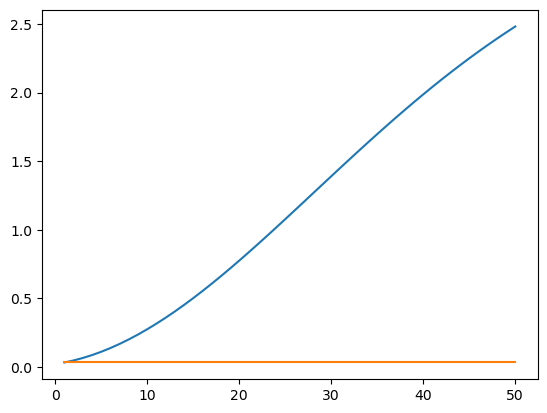

In [360]:
num = 50
avg_arr = np.linspace(1,50,50,dtype=int)
data_forecast_avg_arr = []
for avg in avg_arr:
    data_forecast_avg_arr.append(error(data_true,avg_value_forecast(data_true,h=3,w=avg)))

plt.plot(avg_arr,data_forecast_avg_arr)
plt.plot(avg_arr,error(data_true,previous_value_forecast(data_true,h=3))*np.ones(num))

In [361]:
np.argmin(data_forecast_avg_arr) +1

1

### lin reg forecaster

In [362]:
def linreg_joint_forecast(data_true, h = 3, w = 7): 
    n = len(data_true)
    forecast = np.zeros((n, h, 2))
    time_horizon = np.array([[x] for x in np.arange(1,h+1)])
    lin_model = linear_model.LinearRegression()
    
    for i in range(n):

        if (i < w ):
            time_hist_window  = np.array([[x] for x in np.arange(-i,1)])
        else: 
            time_hist_window = np.array([[x] for x in np.arange(-w+1,1)])

        history = data_true[max(0, i - w + 1):i + 1]

        lin_model.fit(time_hist_window, history)
        forecast[i] = lin_model.predict(time_horizon)
    return forecast   

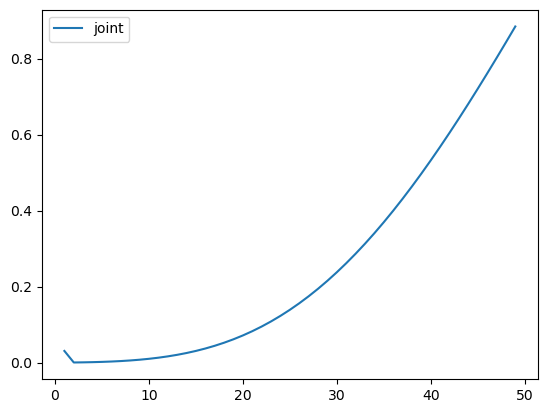

In [363]:
num = 50
w_arr = np.arange(1,num)
data_forecast__arr = []
data_forecast_linreg_arr = []
data_forecast_linreg_joint_arr = []
for w in w_arr:
    data_forecast_linreg_joint_arr.append(error(data_true,linreg_joint_forecast(data_true,h=3,w=w)))
    
plt.plot(w_arr,data_forecast_linreg_joint_arr, label = 'joint')
plt.legend()

In [364]:
np.argmin(data_forecast_linreg_joint_arr)+1

2